In [1]:
#importing packages
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
plt.style.use('ggplot')

In [2]:
#so all DataFrame data is displayed
pd.set_option('display.max_columns',None)
pd.set_option('display.min_rows',0)
pd.set_option('display.max_rows',100)

In [3]:
orders = pd.read_csv('./data/Orders.csv')

In [4]:
returns = pd.read_csv('./data/Returns.csv')

### Part I: Preprocessing and EDA

- The data comes from a global e-retailer company, including orders from 2012 to 2015. Import the **Orders** dataset and do some basic EDA. 
- For problem 1 to 3, we mainly focus on data cleaning and data visualizations. You can use all the packages that you are familiar with to conduct some plots and also provide **brief interpretations** about your findings.

### Problem 1: Dataset Import & Cleaning
Check **"Profit"** and **"Sales"** in the dataset, convert these two columns to numeric type. 

In [5]:
orders.head()

Row.ID                  Order.ID Order.Date Ship.Date     Ship.Mode  \
0   40098  CA-2014-AB10015140-41954   11/11/14  11/13/14   First Class   
1   26341    IN-2014-JR162107-41675     2/5/14    2/7/14  Second Class   
2   25330    IN-2014-CR127307-41929   10/17/14  10/18/14   First Class   
3   13524   ES-2014-KM1637548-41667    1/28/14   1/30/14   First Class   
4   47221   SG-2014-RH9495111-41948    11/5/14   11/6/14      Same Day   

    Customer.ID     Customer.Name      Segment  Postal.Code           City  \
0  AB-100151402     Aaron Bergman     Consumer      73120.0  Oklahoma City   
1     JR-162107     Justin Ritter    Corporate          NaN     Wollongong   
2     CR-127307      Craig Reiter     Consumer          NaN       Brisbane   
3    KM-1637548  Katherine Murray  Home Office          NaN         Berlin   
4    RH-9495111       Rick Hansen     Consumer          NaN          Dakar   

             State        Country          Region        Market   Product.ID  \
0         Oklahoma  United States      Central US          USCA  TEC-PH-5816   
1  New South Wales      Australia         Oceania  Asia Pacific  FUR-CH-5379   
2       Queensland      Australia         Oceania  Asia Pacific  TEC-PH-5356   
3           Berlin        Germany  Western Europe        Europe  TEC-PH-5267   
4            Dakar        Senegal  Western Africa        Africa  TEC-CO-6011   

     Category Sub.Category                               Product.Name  \
0  Technology       Phones                           Samsung Convoy 3   
1   Furniture       Chairs  Novimex Executive Leather Armchair, Black   
2  Technology       Phones          Nokia Smart Phone, with Caller ID   
3  Technology       Phones             Motorola Smart Phone, Cordless   
4  Technology      Copiers             Sharp Wireless Fax, High-Speed   

       Sales  Quantity  Discount    Profit  Shipping.Cost Order.Priority  
0    $221.98         2       0.0    $62.15          40.77           High  
1  $3,709.40         9       0.1  -$288.77         923.63       Critical  
2  $5,175.17         9       0.1   $919.97         915.49         Medium  
3  $2,892.51         5       0.1   -$96.54         910.16         Medium  
4  $2,832.96         8       0.0   $311.52         903.04       Critical

In [7]:
returns.head()

Returned                  Order ID        Region
0      Yes  CA-2012-SA20830140-41210    Central US
1      Yes  IN-2012-PB19210127-41259  Eastern Asia
2      Yes  CA-2012-SC20095140-41174    Central US
3      Yes    IN-2015-JH158207-42140       Oceania
4      Yes    IN-2014-LC168857-41747       Oceania

In [17]:
orders.Profit.head()

0      $62.15
1    -$288.77
2     $919.97
3     -$96.54
4     $311.52
Name: Profit, dtype: object

In [53]:
orders.Profit = orders.Profit.replace('[\$,]', '', regex=True).astype(float)

orders.Sales = orders.Sales.replace('[\$,]', '', regex=True).astype(float)

In [54]:
orders.head()

Row.ID                  Order.ID Order.Date Ship.Date     Ship.Mode  \
0   40098  CA-2014-AB10015140-41954   11/11/14  11/13/14   First Class   
1   26341    IN-2014-JR162107-41675     2/5/14    2/7/14  Second Class   
2   25330    IN-2014-CR127307-41929   10/17/14  10/18/14   First Class   
3   13524   ES-2014-KM1637548-41667    1/28/14   1/30/14   First Class   
4   47221   SG-2014-RH9495111-41948    11/5/14   11/6/14      Same Day   

    Customer.ID     Customer.Name      Segment  Postal.Code           City  \
0  AB-100151402     Aaron Bergman     Consumer      73120.0  Oklahoma City   
1     JR-162107     Justin Ritter    Corporate          NaN     Wollongong   
2     CR-127307      Craig Reiter     Consumer          NaN       Brisbane   
3    KM-1637548  Katherine Murray  Home Office          NaN         Berlin   
4    RH-9495111       Rick Hansen     Consumer          NaN          Dakar   

             State        Country          Region        Market   Product.ID  \
0         Oklahoma  United States      Central US          USCA  TEC-PH-5816   
1  New South Wales      Australia         Oceania  Asia Pacific  FUR-CH-5379   
2       Queensland      Australia         Oceania  Asia Pacific  TEC-PH-5356   
3           Berlin        Germany  Western Europe        Europe  TEC-PH-5267   
4            Dakar        Senegal  Western Africa        Africa  TEC-CO-6011   

     Category Sub.Category                               Product.Name  \
0  Technology       Phones                           Samsung Convoy 3   
1   Furniture       Chairs  Novimex Executive Leather Armchair, Black   
2  Technology       Phones          Nokia Smart Phone, with Caller ID   
3  Technology       Phones             Motorola Smart Phone, Cordless   
4  Technology      Copiers             Sharp Wireless Fax, High-Speed   

     Sales  Quantity  Discount  Profit  Shipping.Cost Order.Priority  
0   221.98         2       0.0   62.15          40.77           High  
1  3709.40         9       0.1 -288.77         923.63       Critical  
2  5175.17         9       0.1  919.97         915.49         Medium  
3  2892.51         5       0.1  -96.54         910.16         Medium  
4  2832.96         8       0.0  311.52         903.04       Critical

### Problem 2: Inventory Management
- Retailers that depend on seasonal shoppers have a particularly challenging job when it comes to inventory management. Your manager is making plans for next year's inventory.
- He wants you to answer the following questions:
    1. Is there any seasonal trend of inventory in the company?
    2. Is the seasonal trend the same for different categories?

- ***Hint:*** For each order, it has an attribute called `Quantity` that indicates the number of product in the order. If an order contains more than one product, there will be multiple observations of the same order.

In [22]:
orders['Month'] = pd.DatetimeIndex(orders['Order.Date']).month

In [99]:
orders.head()

Row.ID                  Order.ID Order.Date Ship.Date     Ship.Mode  \
0   40098  CA-2014-AB10015140-41954   11/11/14  11/13/14   First Class   
1   26341    IN-2014-JR162107-41675     2/5/14    2/7/14  Second Class   
2   25330    IN-2014-CR127307-41929   10/17/14  10/18/14   First Class   
3   13524   ES-2014-KM1637548-41667    1/28/14   1/30/14   First Class   
4   47221   SG-2014-RH9495111-41948    11/5/14   11/6/14      Same Day   

    Customer.ID     Customer.Name      Segment  Postal.Code           City  \
0  AB-100151402     Aaron Bergman     Consumer      73120.0  Oklahoma City   
1     JR-162107     Justin Ritter    Corporate          NaN     Wollongong   
2     CR-127307      Craig Reiter     Consumer          NaN       Brisbane   
3    KM-1637548  Katherine Murray  Home Office          NaN         Berlin   
4    RH-9495111       Rick Hansen     Consumer          NaN          Dakar   

             State        Country          Region        Market   Product.ID  \
0         Oklahoma  United States      Central US          USCA  TEC-PH-5816   
1  New South Wales      Australia         Oceania  Asia Pacific  FUR-CH-5379   
2       Queensland      Australia         Oceania  Asia Pacific  TEC-PH-5356   
3           Berlin        Germany  Western Europe        Europe  TEC-PH-5267   
4            Dakar        Senegal  Western Africa        Africa  TEC-CO-6011   

     Category Sub.Category                               Product.Name  \
0  Technology       Phones                           Samsung Convoy 3   
1   Furniture       Chairs  Novimex Executive Leather Armchair, Black   
2  Technology       Phones          Nokia Smart Phone, with Caller ID   
3  Technology       Phones             Motorola Smart Phone, Cordless   
4  Technology      Copiers             Sharp Wireless Fax, High-Speed   

     Sales  Quantity  Discount  Profit  Shipping.Cost Order.Priority  Month  \
0   221.98         2       0.0   62.15          40.77           High     11   
1  3709.40         9       0.1 -288.77         923.63       Critical      2   
2  5175.17         9       0.1  919.97         915.49         Medium     10   
3  2892.51         5       0.1  -96.54         910.16         Medium      1   
4  2832.96         8       0.0  311.52         903.04       Critical     11   

     Season  
0    3_fall  
1  4_winter  
2    3_fall  
3  4_winter  
4    3_fall

In [98]:
pd.set_option('display.max_columns', None)

In [92]:
orders['Month'] = pd.DatetimeIndex(orders['Order.Date']).month

def month_to_season(month):
    if month in [3,4,5]:
        month = '1_spring'
    elif month in [6,7,8]:
        month = '2_summer'
    elif month in [9,10,11]:
        month = '3_fall'
    else:
        month = '4_winter'
    return(month)

orders['Season'] = orders.Month.apply(month_to_season)

In [36]:
orders.tail()

Row.ID                  Order.ID Order.Date Ship.Date       Ship.Mode  \
51285   29002   IN-2015-KE1642066-42174    6/19/15   6/19/15        Same Day   
51286   34337  US-2014-ZD21925140-41765     5/6/14   5/10/14  Standard Class   
51287   31315  CA-2012-ZD21925140-41147    8/26/12   8/31/12    Second Class   
51288    9596   MX-2013-RB1979518-41322    2/17/13   2/21/13  Standard Class   
51289    6147   MX-2013-MC1810093-41416    5/22/13   5/26/13    Second Class   

        Customer.ID       Customer.Name      Segment  Postal.Code  \
51285    KE-1642066     Katrina Edelman    Corporate          NaN   
51286  ZD-219251408  Zuschuss Donatelli     Consumer      37421.0   
51287  ZD-219251404  Zuschuss Donatelli     Consumer      94109.0   
51288    RB-1979518          Ross Baird  Home Office          NaN   
51289    MC-1810093       Mick Crebagga     Consumer          NaN   

                City  ... Sub.Category  \
51285           Kure  ...    Fasteners   
51286    Chattanooga  ...  Furnishings   
51287  San Francisco  ...          Art   
51288       Valinhos  ...      Binders   
51289       Tipitapa  ...        Paper   

                                        Product.Name  Sales Quantity Discount  \
51285                  Advantus Thumb Tacks, 12 Pack  65.10        5      0.0   
51286  Eldon Image Series Desk Accessories, Burgundy  16.72        5      0.2   
51287                                     Newell 341   8.56        2      0.0   
51288                        Acco Index Tab, Economy  13.44        2      0.0   
51289        Eaton Computer Printout Paper, 8.5 x 11  61.38        3      0.0   

      Profit Shipping.Cost Order.Priority  Month  Season  
51285   4.50         1.010         Medium      6  summer  
51286   3.34         1.930           High      5  spring  
51287   2.48         1.580           High      8  summer  
51288   2.40         1.003         Medium      2  winter  
51289   1.80         1.002           High      5  spring  

[5 rows x 26 columns]

In [37]:
orders.Season.describe()

count     51290
unique        4
top        fall
freq      16825
Name: Season, dtype: object

In [38]:
orders.groupby('Season').aggregate("count")

Row.ID  Order.ID  Order.Date  Ship.Date  Ship.Mode  Customer.ID  \
Season                                                                    
fall     16825     16825       16825      16825      16825        16825   
spring    9826      9826        9826       9826       9826         9826   
summer   13562     13562       13562      13562      13562        13562   
winter   11077     11077       11077      11077      11077        11077   

        Customer.Name  Segment  Postal.Code   City  ...  Category  \
Season                                              ...             
fall            16825    16825         3672  16825  ...     16825   
spring           9826     9826         2094   9826  ...      9826   
summer          13562    13562         2121  13562  ...     13562   
winter          11077    11077         2107  11077  ...     11077   

        Sub.Category  Product.Name  Sales  Quantity  Discount  Profit  \
Season                                                                  
fall           16825         16825  16825     16825     16825   16825   
spring          9826          9826   9826      9826      9826    9826   
summer         13562         13562  13562     13562     13562   13562   
winter         11077         11077  11077     11077     11077   11077   

        Shipping.Cost  Order.Priority  Month  
Season                                        
fall            16825           16825  16825  
spring           9826            9826   9826  
summer          13562           13562  13562  
winter          11077           11077  11077  

[4 rows x 25 columns]

In [103]:
season_quantity = orders.groupby(['Season']).agg({"Quantity": 'sum'})


season_quantity 

Quantity
Season            
1_spring     34052
2_summer     46651
3_fall       59161
4_winter     38448

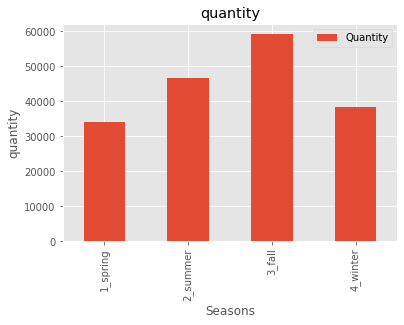

In [107]:
season_quantity.plot.bar()
plt.title('quantity')
plt.xlabel('Seasons')
plt.ylabel('quantity')
plt.show()

In [100]:
season_category = orders.groupby(['Season', 'Category']).agg({'Row.ID': "count",'Profit':'sum', "Quantity": 'sum'})

In [101]:
season_category

Row.ID     Profit  Quantity
Season   Category                                    
1_spring Furniture          1856   41635.46      6587
         Office Supplies    6054  104256.93     20844
         Technology         1916  126773.70      6621
2_summer Furniture          2488   63350.29      8650
         Office Supplies    8381  136797.00     28649
         Technology         2693  175576.04      9352
3_fall   Furniture          3347  113388.94     11905
         Office Supplies   10170  163654.58     35686
         Technology         3308  227549.67     11570
4_winter Furniture          2169   66707.93      7750
         Office Supplies    6684  113886.33     23065
         Technology         2224  133879.80      7633

In [95]:
Furniture = orders["Category"]=='Furniture'
test_f = orders[Furniture]
Technology = orders["Category"]=='Technology'
test_t = orders[Technology]
Office_Supplies = orders["Category"]=='Office Supplies'
test_os = orders[Office_Supplies]

In [96]:
test_category = pd.DataFrame({'Office Supplies':test_os.Season.value_counts(),'Furniture': test_f.Season.value_counts(), 'Technology': test_t.Season.value_counts()})

test_category




Office Supplies  Furniture  Technology
3_fall              10170       3347        3308
2_summer             8381       2488        2693
4_winter             6684       2169        2224
1_spring             6054       1856        1916

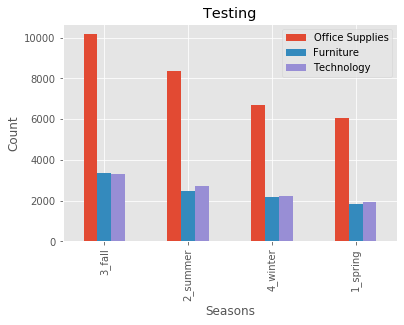

In [97]:
test_category.plot.bar()
plt.title('Testing')
plt.xlabel('Seasons')
plt.ylabel('Count')
plt.show()

### Problem 3: Why did customers make returns?

- Your manager required you to give a brief report (**Plots + Interpretations**) on returned orders.

	1. How much profit did we lose due to returns each year?


	2. How many customer returned more than once? more than 5 times?


	3. Which regions are more likely to return orders?


	4. Which categories (sub-categories) of products are more likely to be returned?

- ***Hint:*** Merge the **Returns** dataframe with the **Orders** dataframe using `Order.ID`.

In [8]:
returns.head()

Returned                  Order ID        Region
0      Yes  CA-2012-SA20830140-41210    Central US
1      Yes  IN-2012-PB19210127-41259  Eastern Asia
2      Yes  CA-2012-SC20095140-41174    Central US
3      Yes    IN-2015-JH158207-42140       Oceania
4      Yes    IN-2014-LC168857-41747       Oceania

In [9]:
orders.head()

Row.ID                  Order.ID Order.Date Ship.Date     Ship.Mode  \
0   40098  CA-2014-AB10015140-41954   11/11/14  11/13/14   First Class   
1   26341    IN-2014-JR162107-41675     2/5/14    2/7/14  Second Class   
2   25330    IN-2014-CR127307-41929   10/17/14  10/18/14   First Class   
3   13524   ES-2014-KM1637548-41667    1/28/14   1/30/14   First Class   
4   47221   SG-2014-RH9495111-41948    11/5/14   11/6/14      Same Day   

    Customer.ID     Customer.Name      Segment  Postal.Code           City  \
0  AB-100151402     Aaron Bergman     Consumer      73120.0  Oklahoma City   
1     JR-162107     Justin Ritter    Corporate          NaN     Wollongong   
2     CR-127307      Craig Reiter     Consumer          NaN       Brisbane   
3    KM-1637548  Katherine Murray  Home Office          NaN         Berlin   
4    RH-9495111       Rick Hansen     Consumer          NaN          Dakar   

             State        Country          Region        Market   Product.ID  \
0         Oklahoma  United States      Central US          USCA  TEC-PH-5816   
1  New South Wales      Australia         Oceania  Asia Pacific  FUR-CH-5379   
2       Queensland      Australia         Oceania  Asia Pacific  TEC-PH-5356   
3           Berlin        Germany  Western Europe        Europe  TEC-PH-5267   
4            Dakar        Senegal  Western Africa        Africa  TEC-CO-6011   

     Category Sub.Category                               Product.Name  \
0  Technology       Phones                           Samsung Convoy 3   
1   Furniture       Chairs  Novimex Executive Leather Armchair, Black   
2  Technology       Phones          Nokia Smart Phone, with Caller ID   
3  Technology       Phones             Motorola Smart Phone, Cordless   
4  Technology      Copiers             Sharp Wireless Fax, High-Speed   

       Sales  Quantity  Discount    Profit  Shipping.Cost Order.Priority  
0    $221.98         2       0.0    $62.15          40.77           High  
1  $3,709.40         9       0.1  -$288.77         923.63       Critical  
2  $5,175.17         9       0.1   $919.97         915.49         Medium  
3  $2,892.51         5       0.1   -$96.54         910.16         Medium  
4  $2,832.96         8       0.0   $311.52         903.04       Critical

### Need to rename column to Merge on Order ID

In [23]:
returns.rename(columns = {"Order ID": "Order.ID"}, inplace = True)

In [37]:
returns.head()

Returned                  Order.ID        Region
0      Yes  CA-2012-SA20830140-41210    Central US
1      Yes  IN-2012-PB19210127-41259  Eastern Asia
2      Yes  CA-2012-SC20095140-41174    Central US
3      Yes    IN-2015-JH158207-42140       Oceania
4      Yes    IN-2014-LC168857-41747       Oceania

### Merged Returns and Orders

In [25]:
RO_df = pd.merge(returns, orders, on = 'Order.ID')
RO_df.shape[0]

2220

In [38]:
RO_df.head()

Returned                  Order.ID      Region_x  Row.ID Order.Date  \
0      Yes  CA-2012-SA20830140-41210    Central US   31784   10/28/12   
1      Yes  IN-2012-PB19210127-41259  Eastern Asia   30191   12/16/12   
2      Yes  IN-2012-PB19210127-41259  Eastern Asia   30190   12/16/12   
3      Yes  IN-2012-PB19210127-41259  Eastern Asia   30187   12/16/12   
4      Yes  IN-2012-PB19210127-41259  Eastern Asia   30193   12/16/12   

  Ship.Date    Ship.Mode   Customer.ID   Customer.Name    Segment  \
0  10/30/12  First Class  SA-208301402    Sue Ann Reed   Consumer   
1  12/19/12  First Class   PB-19210127  Phillip Breyer  Corporate   
2  12/19/12  First Class   PB-19210127  Phillip Breyer  Corporate   
3  12/19/12  First Class   PB-19210127  Phillip Breyer  Corporate   
4  12/19/12  First Class   PB-19210127  Phillip Breyer  Corporate   

   Postal.Code     City        State        Country      Region_y  \
0      60610.0  Chicago     Illinois  United States    Central US   
1          NaN   Taipei  Taipei City         Taiwan  Eastern Asia   
2          NaN   Taipei  Taipei City         Taiwan  Eastern Asia   
3          NaN   Taipei  Taipei City         Taiwan  Eastern Asia   
4          NaN   Taipei  Taipei City         Taiwan  Eastern Asia   

         Market   Product.ID    Category Sub.Category  \
0          USCA  TEC-PH-3138  Technology       Phones   
1  Asia Pacific  FUR-TA-5060   Furniture       Tables   
2  Asia Pacific  FUR-BO-5762   Furniture    Bookcases   
3  Asia Pacific  FUR-TA-5065   Furniture       Tables   
4  Asia Pacific  FUR-CH-5454   Furniture       Chairs   

                                  Product.Name      Sales  Quantity  Discount  \
0                              Apple iPhone 5S  $2,735.95         6       0.2   
1  Lesro Conference Table, with Bottom Storage  $1,715.16         2       0.0   
2                 Safco Classic Bookcase, Pine  $2,197.50         5       0.0   
3       Lesro Round Table, with Bottom Storage  $1,356.03         3       0.0   
4         Office Star Swivel Stool, Adjustable    $882.15         5       0.0   

    Profit  Shipping.Cost Order.Priority  
0  $341.99         752.51           High  
1  $720.36         725.57       Critical  
2  $153.75         627.27       Critical  
3  $311.85         458.97       Critical  
4  $114.60         203.92       Critical

#### Make Profits a Float

In [56]:
RO_df.Profit = RO_df.Profit.replace('[\$,]', '', regex=True).astype(float)

RO_df.Sales = RO_df.Sales.replace('[\$,]', '', regex=True).astype(float)

In [73]:
RO_df.shape[0]

2220

In [57]:
RO_df.describe().round()

Row.ID  Postal.Code   Sales  Quantity  Discount  Profit  Shipping.Cost
count   2220.0        468.0  2220.0    2220.0    2220.0  2220.0         2220.0
mean   25489.0      56505.0   237.0       3.0       0.0    27.0           27.0
std    14502.0      33258.0   469.0       2.0       0.0   169.0           62.0
min       25.0       4240.0     1.0       1.0       0.0 -1694.0            1.0
25%    13248.0      22204.0    29.0       2.0       0.0     0.0            2.0
50%    25614.0      60623.0    84.0       3.0       0.0     8.0            7.0
75%    37040.0      90046.0   245.0       5.0       0.0    38.0           23.0
max    51280.0      98105.0  9450.0      14.0       1.0  4630.0          753.0

### 1. How much profit did we lose due to returns each year?

In [58]:
sum(RO_df['Profit'])

60838.0

In [55]:
sum(orders['Profit'])

1467456.669999988

In [63]:
((sum(orders['Profit'])) - (sum(RO_df['Profit'])))

1406618.669999988

### 2. How many customer returned more than once? more than 5 times?

In [87]:
Return1 = RO_df.groupby("Order.ID").filter(lambda x: x.shape[0] > 1)

Return1.shape[0]

1692

In [71]:
Return5 = RO_df.groupby("Order.ID").filter(lambda x: x.shape[0] > 5)

Return5.shape[0]

295

### 3. Which regions are more likely to return orders?

In [79]:
R_byRegion = RO_df.groupby("Region_x").filter(lambda x: x.shape[0] > 100)

R_byRegion["Region_x"].value_counts()

Central America      248
Western Europe       233
Western US           180
Oceania              154
Southeastern Asia    140
Eastern US           134
South America        133
Eastern Asia         131
Southern Europe      112
Southern Asia        111
Western Asia         108
Name: Region_x, dtype: int64

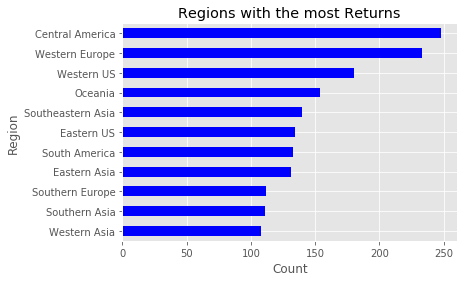

In [80]:
R_byRegion["Region_x"].value_counts().sort_values(ascending=True).plot(kind='barh',y='count', color='b')
plt.title('Regions with the most Returns')
plt.xlabel('Count')
plt.ylabel('Region')
plt.show()

### 4. Which categories (sub-categories) of products are more likely to be returned?


In [85]:
R_bySubCategory = RO_df.groupby("Sub.Category").filter(lambda x: x.shape[0] > 100)

R_bySubCategory["Sub.Category"].value_counts()

Binders        269
Art            217
Storage        212
Paper          150
Chairs         147
Phones         145
Accessories    138
Labels         137
Furnishings    135
Bookcases      104
Supplies       103
Fasteners      102
Name: Sub.Category, dtype: int64

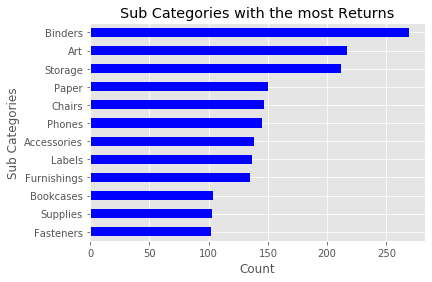

In [86]:
R_bySubCategory["Sub.Category"].value_counts().sort_values(ascending=True).plot(kind='barh',y='count', color='b')
plt.title('Sub Categories with the most Returns')
plt.xlabel('Count')
plt.ylabel('Sub Categories')
plt.show()

### extra: by category 

In [83]:
R_byCategory = RO_df.groupby("Category").filter(lambda x: x.shape[0] > 5)

R_byCategory["Category"].value_counts()

Office Supplies    1348
Technology          445
Furniture           427
Name: Category, dtype: int64